In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("AB_NYC_2019.csv") #load dataset

In [5]:
print("🔍 First 5 Rows:")
print(df.head())

🔍 First 5 Rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1       

In [6]:
print("\n📏 Shape of data:")
print(df.shape)


📏 Shape of data:
(48895, 16)


In [7]:
print("\n🧼 Null values:")
print(df.isnull().sum())


🧼 Null values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
print("\n🧬 Data Types:")
print(df.dtypes)


🧬 Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [9]:
df.isnull().sum()# Check missing values again

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# Drop rows where 'name' or 'host_name' is missing (not useful without them)
df.dropna(subset=['name', 'host_name'], inplace=True)

In [13]:
# Fill missing 'reviews_per_month' with 0 (no reviews)
df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_17940\3503944266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [15]:
# Count of each room type
print(df['room_type'].value_counts())

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64


C:\Users\Akshay\AppData\Local\Temp\ipykernel_17940\1867897729.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='room_type',palette='Set2')


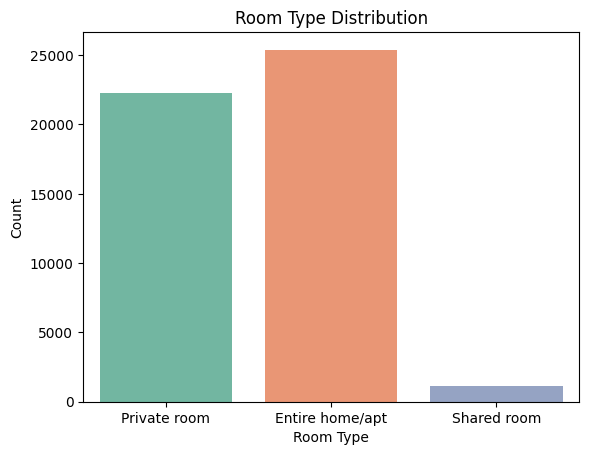

In [16]:
sns.countplot(data=df,x='room_type',palette='Set2')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


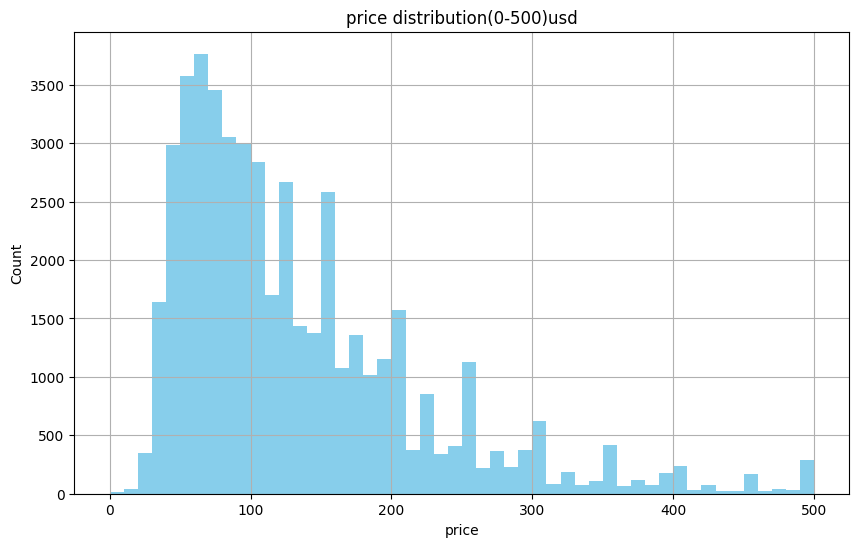

In [17]:
# Summary stats
print(df['price'].describe())
# Histogram of prices (limit to 0–500 for better view)
plt.figure(figsize=(10,6))
df[df['price']<=500]['price'].hist(bins=50,color='skyblue')
plt.title("price distribution(0-500)usd")
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

C:\Users\Akshay\AppData\Local\Temp\ipykernel_17940\2312558372.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='Set3')


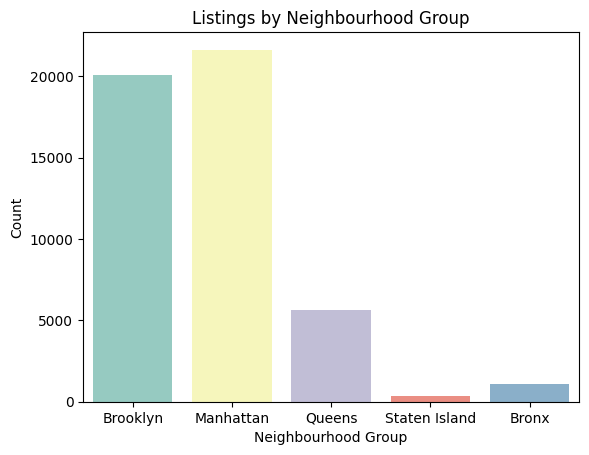

In [18]:
# Count of listings by neighbourhood group
df['neighbourhood_group'].value_counts()
# Plot
sns.countplot(data=df, x='neighbourhood_group', palette='Set3')
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

C:\Users\Akshay\AppData\Local\Temp\ipykernel_17940\2595489758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['price'] <= 500], x='room_type', y='price', palette='Set2')


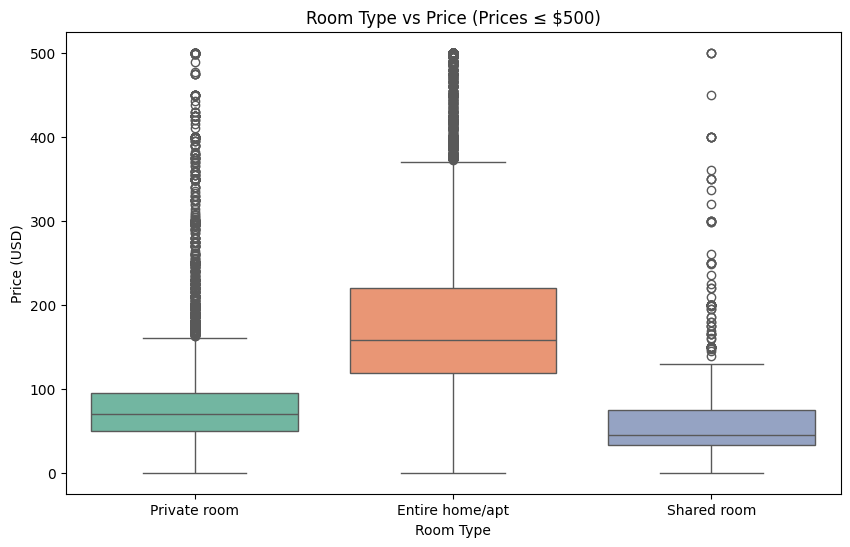

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['price'] <= 500], x='room_type', y='price', palette='Set2')
plt.title("Room Type vs Price (Prices ≤ $500)")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.show()

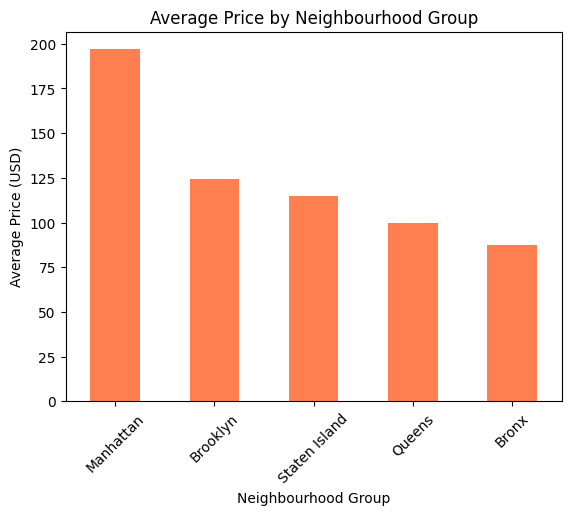

In [20]:
# Group by neighbourhood and calculate average price
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Plot
avg_price_by_neighbourhood.plot(kind='bar', color='coral')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price (USD)")
plt.xlabel("Neighbourhood Group")
plt.xticks(rotation=45)
plt.show()

C:\Users\Akshay\AppData\Local\Temp\ipykernel_17940\3788625547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='availability_365', palette='Set1')


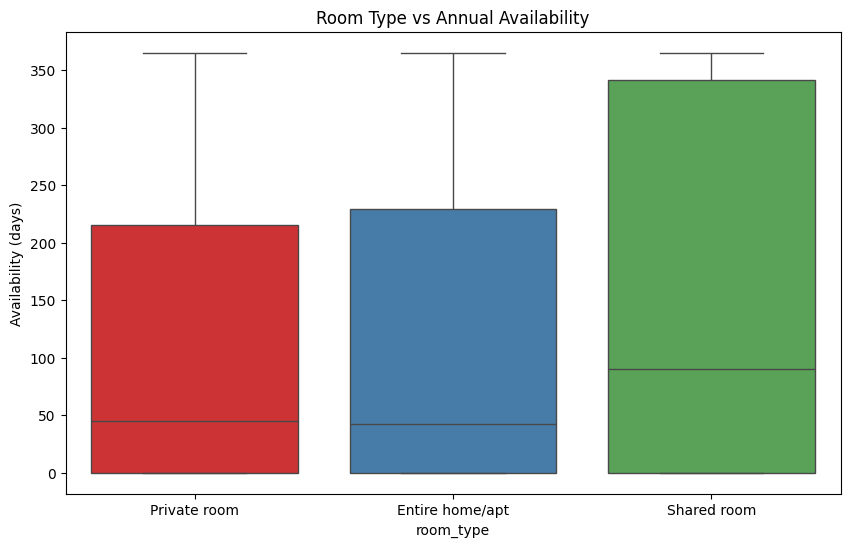

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room_type', y='availability_365', palette='Set1')
plt.title("Room Type vs Annual Availability")
plt.ylabel("Availability (days)")
plt.show()